# Crypto Market Data Analysis using CoinMarketCap API
This project analyzes real-time cryptocurrency market data fetched from the CoinMarketCap API. It demonstrates API integration, data cleaning, exploratory data analysis, and visualization.

## Skills Demonstrated
- Python
- API Integration
- Data Cleaning & Transformation
- Exploratory Data Analysis (EDA)
- Data Visualization
- Pandas & NumPy

In [1]:
import requests
import pandas as pd
import os
from dotenv import load_dotenv
from IPython.display import display

load_dotenv()
API_KEY = os.getenv('CMC_API_KEY')

In [2]:
print(API_KEY)

a0f6a468f13e4dc1bdd9fa6885d01e11


In [3]:
import pandas as pd
pd.set_option('display.max_rows', 50)

In [4]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
headers = {'Accepts': 'application/json','X-CMC_PRO_API_KEY': API_KEY}
params = {'start':'1','limit':'25','convert':'USD'}

response = requests.get(url, headers=headers, params=params)

if response.status_code == 200:
    response_json = response.json()
    df = pd.json_normalize(response_json['data'])
    display(df)
else:
    print("API Error:", response.status_code)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,12503,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.996591e+07,1.996591e+07,...,1.746112e+12,59.0269,1.836548e+12,None,2025-12-23T09:52:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,11290,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206950e+08,1.206950e+08,...,3.576118e+11,12.0890,3.576118e+11,None,2025-12-23T09:52:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,163902,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.869068e+11,1.888515e+11,...,1.867790e+11,6.3140,1.887223e+11,None,2025-12-23T09:52:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,3020,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.377349e+08,1.377349e+08,1.377349e+08,...,1.168840e+11,3.9501,1.168840e+11,None,2025-12-23T09:53:00.000Z,NaN,NaN,NaN,NaN,NaN
4,52,XRP,XRP,xrp,1774,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.057294e+10,9.998574e+10,...,1.142013e+11,3.8599,1.885351e+11,None,2025-12-23T09:52:00.000Z,NaN,NaN,NaN,NaN,NaN
5,3408,USDC,USDC,usd-coin,35767,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.709261e+10,7.709261e+10,...,7.708646e+10,2.6059,7.708646e+10,None,2025-12-23T09:52:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
6,5426,Solana,SOL,solana,1065,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.624157e+08,6.167243e+08,...,6.982367e+10,2.3604,7.656606e+10,None,2025-12-23T09:52:00.000Z,NaN,NaN,NaN,NaN,NaN
7,1958,TRON,TRX,tron,1272,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.468813e+10,9.468813e+10,...,2.685500e+10,0.9078,2.685500e+10,None,2025-12-23T09:52:00.000Z,NaN,NaN,NaN,NaN,NaN
8,74,Dogecoin,DOGE,dogecoin,1361,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.680116e+11,1.680116e+11,...,2.188510e+10,0.7398,2.188510e+10,None,2025-12-23T09:52:00.000Z,NaN,NaN,NaN,NaN,NaN
9,2010,Cardano,ADA,cardano,1646,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.592595e+10,4.499443e+10,...,1.308310e+10,0.4423,1.638758e+10,None,2025-12-23T09:52:00.000Z,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

In [5]:
df = df[['name','symbol','quote.USD.price','quote.USD.market_cap',
         'quote.USD.volume_24h','quote.USD.percent_change_24h']]

df.columns = ['Cryptocurrency','Symbol','Price_USD',
              'Market_Cap_USD','Volume_24h','Percent_Change_24h']

df

,Cryptocurrency,Symbol,Price_USD,Market_Cap_USD,Volume_24h,Percent_Change_24h
0,Bitcoin,BTC,87454.671582,1.746112e+12,4.480189e+10,-2.459144
1,Ethereum,ETH,2962.938430,3.576118e+11,2.023880e+10,-2.372461
2,Tether USDt,USDT,0.999316,1.867790e+11,7.802166e+10,-0.019237
3,BNB,BNB,848.615832,1.168840e+11,1.805040e+09,-1.699889
4,XRP,XRP,1.885351,1.142013e+11,2.549810e+09,-1.702982
5,USDC,USDC,0.999920,7.708646e+10,1.918215e+10,0.013744
6,Solana,SOL,124.149584,6.982367e+10,3.291926e+09,-1.430405
7,TRON,TRX,0.283615,2.685500e+10,5.306133e+08,-1.313903
8,Dogecoin,DOGE,0.130259,2.188510e+10,1.039884e+09,-1.332316
9,Cardano,ADA,0.364169,1.308310e+10,5.248415e+08,-1.187899


## Top 10 Cryptocurrencies by Market Cap

In [6]:
top10 = df.sort_values(by='Market_Cap_USD', ascending=False).head(10)
top10[['Cryptocurrency','Market_Cap_USD']]

,Cryptocurrency,Market_Cap_USD
0,Bitcoin,1.746112e+12
1,Ethereum,3.576118e+11
2,Tether USDt,1.867790e+11
3,BNB,1.168840e+11
4,XRP,1.142013e+11
5,USDC,7.708646e+10
6,Solana,6.982367e+10
7,TRON,2.685500e+10
8,Dogecoin,2.188510e+10
9,Cardano,1.308310e+10


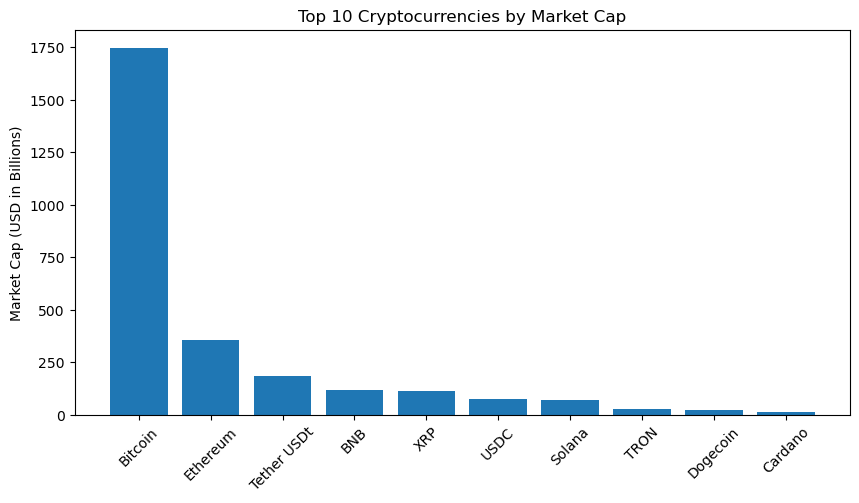

In [10]:
import matplotlib.pyplot as plt

top10['Market_Cap_USD_Bn'] = top10['Market_Cap_USD'] / 1e9

plt.figure(figsize=(10,5))
plt.bar(top10['Cryptocurrency'], top10['Market_Cap_USD_Bn'])
plt.xticks(rotation=45)
plt.title('Top 10 Cryptocurrencies by Market Cap')
plt.ylabel('Market Cap (USD in Billions)')
plt.show()

## Key Insights

- Bitcoin dominates the crypto market with the highest market capitalization.
- Ethereum holds a strong second position due to its ecosystem adoption.
- Stablecoins like USDT and USDC rank high because of large circulating supply.
- The sharp drop after the top two assets shows high market concentration.


## Price vs Volume Analysis

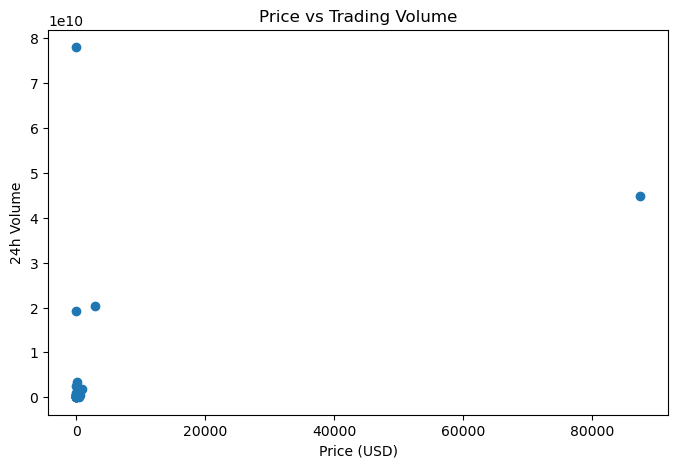

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(df['Price_USD'], df['Volume_24h'])
plt.xlabel('Price (USD)')
plt.ylabel('24h Volume')
plt.title('Price vs Trading Volume')
plt.show()

### Price vs Trading Volume Insights

- High-priced cryptocurrencies do not necessarily have the highest trading volume.
- Stablecoins show disproportionately high trading volumes due to frequent use in transactions and trading pairs.
- Trading activity is driven more by liquidity and utility than by asset price.
- This highlights the importance of volume analysis alongside price-based metrics.


## Volatility Analysis

In [14]:
volatility = df.sort_values(by='Percent_Change_24h', ascending=False)
volatility[['Cryptocurrency', 'Percent_Change_24h']]

,Cryptocurrency,Percent_Change_24h
10,Bitcoin Cash,0.811846
5,USDC,0.013744
19,Dai,0.002074
24,PayPal USD,-0.000605
2,Tether USDt,-0.019237
17,Ethena USDe,-0.043106
21,Avalanche,-0.219128
9,Cardano,-1.187899
7,TRON,-1.313903
8,Dogecoin,-1.332316


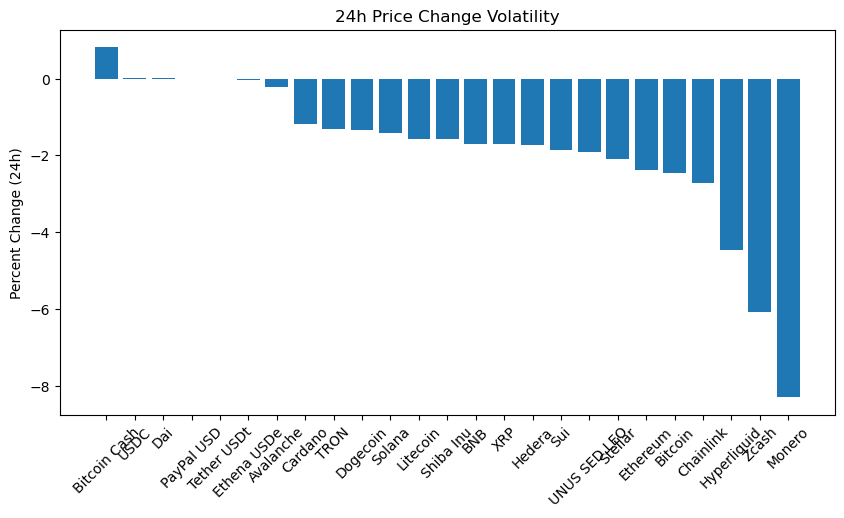

In [15]:
plt.figure(figsize=(10,5))
plt.bar(volatility['Cryptocurrency'], volatility['Percent_Change_24h'])
plt.xticks(rotation=45)
plt.title('24h Price Change Volatility')
plt.ylabel('Percent Change (24h)')
plt.show()

### Volatility Insights

- Most cryptocurrencies experienced negative price movement over the last 24 hours, indicating a short-term market downturn.
- Large-cap assets such as Bitcoin and Ethereum show relatively lower volatility compared to smaller coins.
- Smaller and niche cryptocurrencies exhibit higher short-term price fluctuations, highlighting increased risk.
- This reinforces the importance of considering volatility alongside market capitalization when evaluating crypto asets.
